## 911 Calls Data from *Kaggle*

For this project I would be performing some basic exploratory analysis on previously collected data from **Kaggel**, to show some trends regarding the 911 calls made from the Montgomery County, Pennsylvania  

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
sns.set()
sns.set_style('whitegrid')

**The CSV file is then read into a Data Frame**

In [2]:
calls=pd.read_csv('911.csv')

**Quick Summary of the dataset**

In [3]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**In order to arrange the data neatly so as to facilitate easier analysis, a couple of modification has to be made to the dataset**

* Splitting the reason for the call 
* Converting the *timestamp* into datetime
* Adding columns for hour, day, month and date

In [4]:
calls['Reason'] = calls['title'].apply(lambda var: var.split(':')[0])
calls['Reason-subclass'] = calls['title'].apply(lambda var: var.split(':')[1])

In [5]:
calls['timeStamp']=pd.to_datetime(calls['timeStamp'])

In [6]:
calls['hour'] = calls['timeStamp'].apply(lambda var:var.hour)
calls['month'] = calls['timeStamp'].apply(lambda var:var.month)
calls['day of week'] = calls['timeStamp'].apply(lambda var:var.dayofweek)
calls['Date'] = calls['timeStamp'].apply(lambda var:var.date())

**Summary of the modified Dataset**

In [7]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Reason-subclass,hour,month,day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,12,3,2015-12-10


**From the dataset we can look at the list of the top 5 townships that made the most number of calls**

In [8]:
top_five = calls['twp'].value_counts().head(5)
print(top_five)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64


**Now looking at the number of calls based on the *Reason for the call*.**

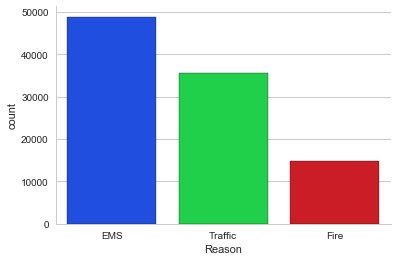

In [9]:
sns.countplot(x='Reason', data=calls ,palette='bright', order = calls['Reason'].value_counts().index)
sns.despine()

**Looking further into the subclass, we get to identify the categories of the Emergency, Traffic or Fire calls being made**

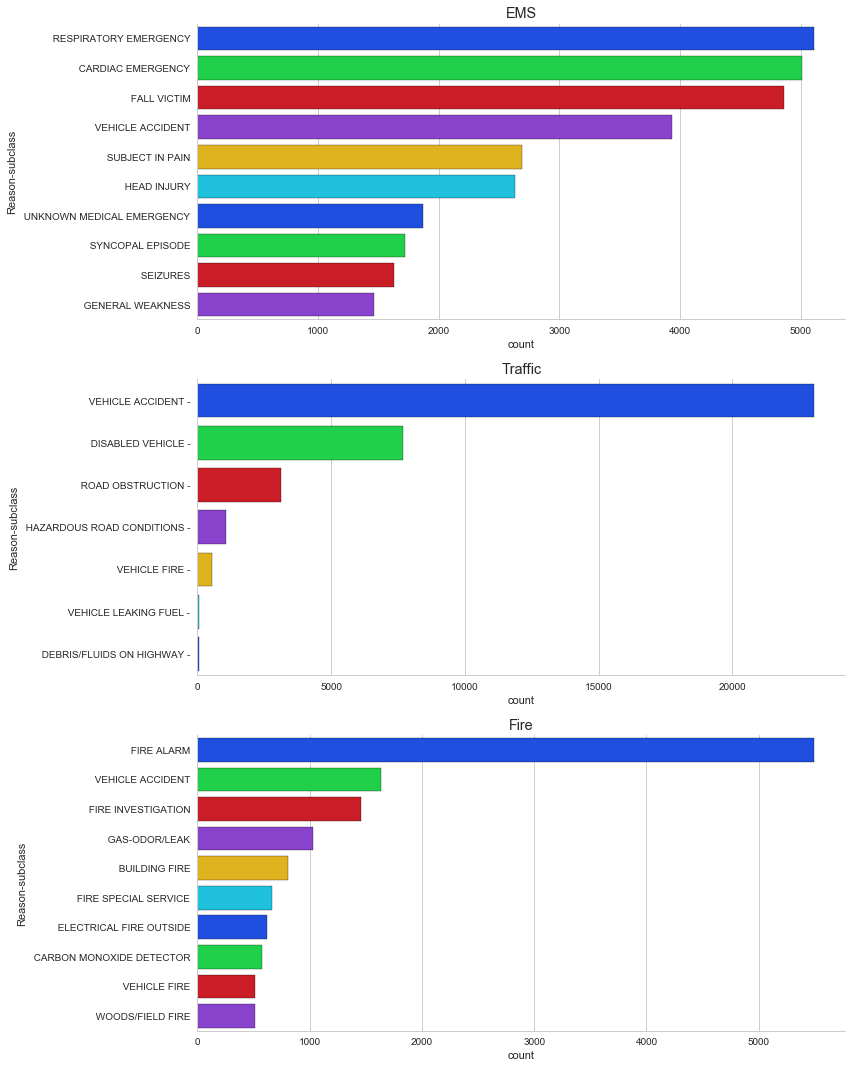

In [10]:
fig,ax = plt.subplots(3,1, figsize=(12,15))
sns.countplot(data=calls[calls['Reason']=='EMS'], y='Reason-subclass', palette = 'bright', order = calls[calls['Reason']=='EMS']['Reason-subclass'].value_counts().index[0:10], ax=ax[0])
ax[0].set_title('EMS', fontsize = 'large')
sns.countplot(data=calls[calls['Reason']=='Traffic'], y='Reason-subclass', palette = 'bright', order = calls[calls['Reason']=='Traffic']['Reason-subclass'].value_counts().index[0:10], ax=ax[1])
ax[1].set_title('Traffic', fontsize = 'large')
sns.countplot(data=calls[calls['Reason']=='Fire'], y='Reason-subclass', palette = 'bright', order = calls[calls['Reason']=='Fire']['Reason-subclass'].value_counts().index[0:10], ax=ax[2])
ax[2].set_title('Fire', fontsize = 'large')
sns.despine()
plt.tight_layout()

**The figures above list the top sub fields of each reason mentioned earlier. Although we had seen earlier that the EMS had the most number of 911 calls made, from the plot above we can see that the individual subclass that caused the most number of 911 calls is *Vehicle Accident* under the "Traffic" reason  **

In [11]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
calls['Day of Week'] = calls['day of week'].map(dmap)
lmap = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'] 
calls['Day of Week'] = pd.Categorical(calls['Day of Week'], lmap) 

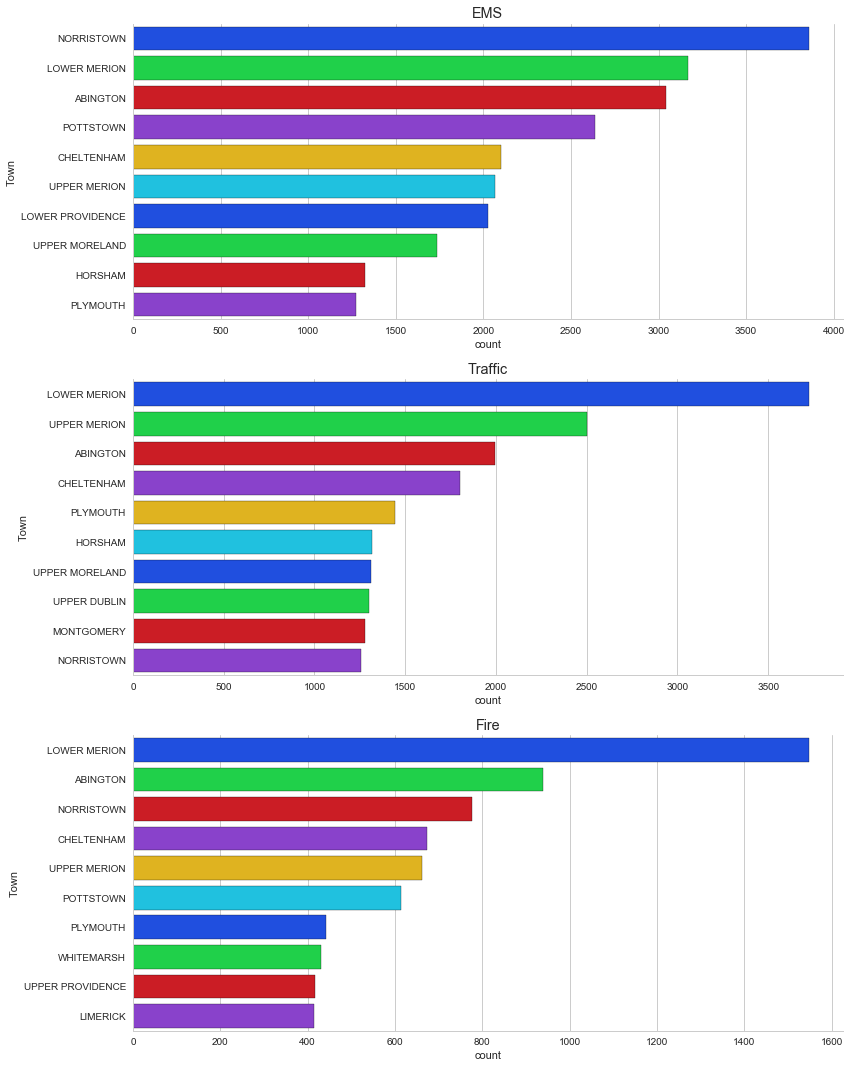

In [12]:
fig,ax = plt.subplots(3,1, figsize=(12,15))
sns.countplot(data=calls[calls['Reason']=='EMS'], y='twp', palette = 'bright', order = calls[calls['Reason']=='EMS']['twp'].value_counts().index[0:10], ax=ax[0])
ax[0].set_title('EMS', fontsize = 'large')
ax[0].set_ylabel('Town')
sns.countplot(data=calls[calls['Reason']=='Traffic'], y='twp', palette = 'bright', order = calls[calls['Reason']=='Traffic']['twp'].value_counts().index[0:10], ax=ax[1])
ax[1].set_title('Traffic', fontsize = 'large')
ax[1].set_ylabel('Town')
sns.countplot(data=calls[calls['Reason']=='Fire'], y='twp', palette = 'bright', order = calls[calls['Reason']=='Fire']['twp'].value_counts().index[0:10], ax=ax[2])
ax[2].set_title('Fire', fontsize = 'large')
ax[2].set_ylabel('Town')
sns.despine()
plt.tight_layout()

**It was shown before that the township with the highest number of 911 calls was *Lower Merion*, the bar plot confirms this. But in terms of Emergency calls, Norristown makes 20% more calls than Lower Merion** 

**Looking at the data now with respect to time**

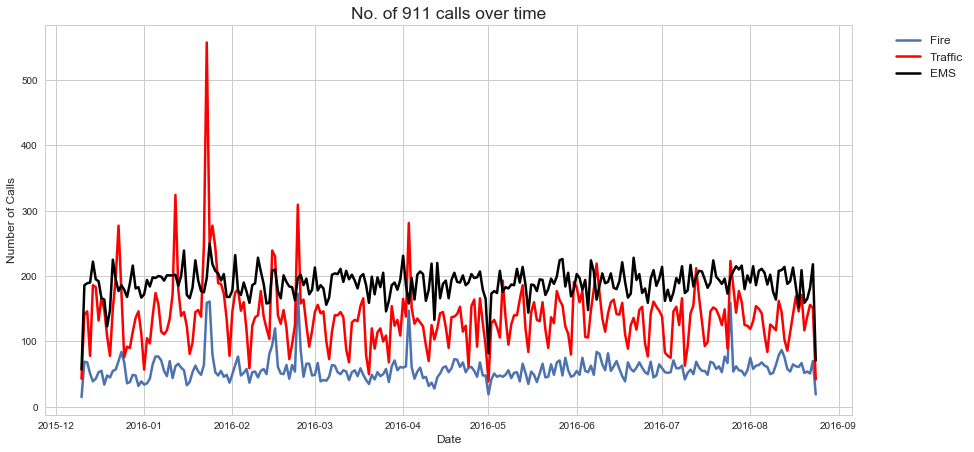

In [13]:
grp_Fire = calls[calls['Reason']=='Fire'].groupby('Date').count()
grp_Traf = calls[calls['Reason']=='Traffic'].groupby('Date').count()
grp_EMS = calls[calls['Reason']=='EMS'].groupby('Date').count()
fig = plt.figure(figsize=(12, 6))
plt.plot(grp_Fire['lat'],lw=2.5, label='Fire')
plt.plot(grp_Traf['lat'],lw=2.5, color = 'red', label='Traffic')
plt.plot(grp_EMS['lat'],lw=2.5, color = 'black', label='EMS')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.15, 1), fontsize = 'medium')
plt.xlabel('Date', fontsize = 'medium')
plt.ylabel('Number of Calls', fontsize = 'medium')
plt.title('No. of 911 calls over time', fontsize = 'x-large')
plt.show()

**A heatmap would be a good way to visualize data in identify specific hours or months of calls** 

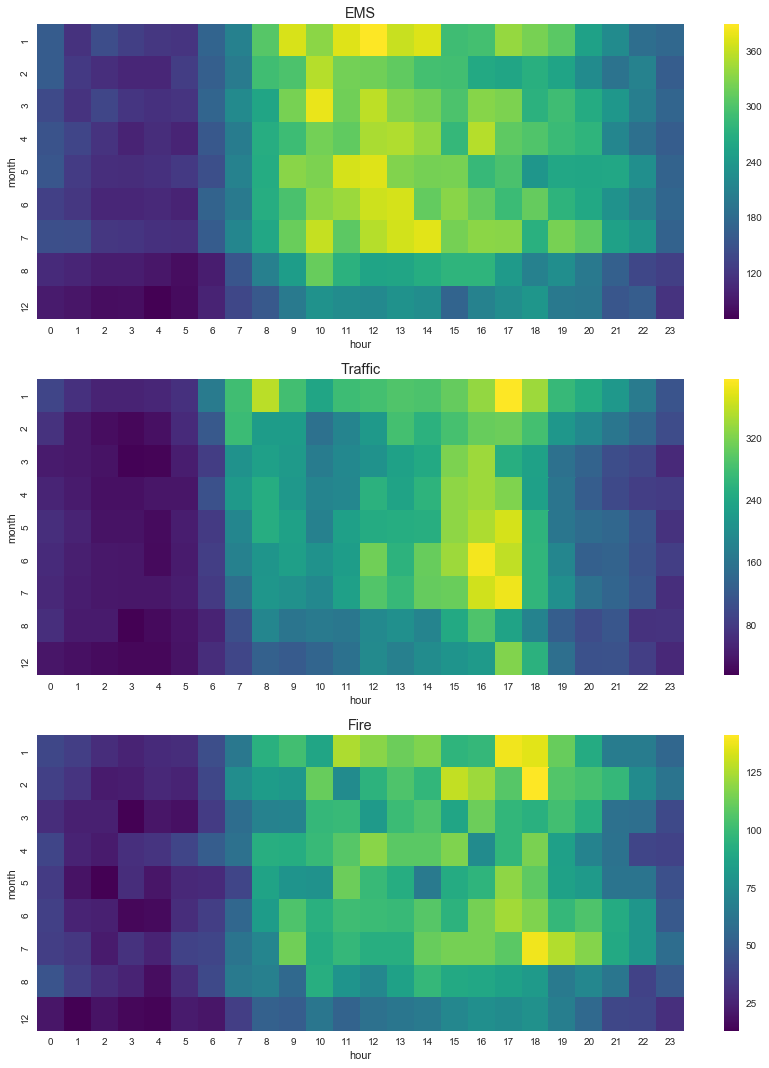

In [14]:
table1 = calls[calls['Reason']=='EMS'].pivot_table(values='e', index=['month'], columns = ['hour'], aggfunc = len)
table2 = calls[calls['Reason']=='Traffic'].pivot_table(values='e', index=['month'], columns = ['hour'], aggfunc = len)
table3 = calls[calls['Reason']=='Fire'].pivot_table(values='e', index=['month'], columns = ['hour'], aggfunc = len)
figure,ax = plt.subplots(3,1,figsize=(12,15))
sns.heatmap(table1, cmap = 'viridis', ax=ax[0])
ax[0].set_title('EMS', fontsize = 'large')
sns.heatmap(table2, cmap = 'viridis', ax=ax[1])
ax[1].set_title('Traffic', fontsize = 'large')
sns.heatmap(table3, cmap = 'viridis', ax=ax[2])
ax[2].set_title('Fire', fontsize = 'large')
plt.tight_layout()

* It looks like most of the Emergency calls are being made during the day time, while the Traffic and Fire calls are being made during the evening
* We also notice the dearth in calls towards the end of the year and a strong rise in calls at the beginning of the year.
* Very few calls are made into midnight/early morning.

** More analysis can be drawn from the data on looking more closely at parameter such as calls made froma specific location due to respiratory difficulties etc. For the purposes of this project, we restrict ourselves to the afore-mentioned analysis, as we focus more on understanding and using the packages of Python for the purpose of Data Analysis.**  